In [1]:
# DS Libraries
import pandas as pd
import numpy as np
from scipy import stats
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# knn submodules from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# Data Acquisition
from pydataset import data
import env
import acquire as acq
import prepare as prp

#Modeling
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# load telco via acquire.py
df = acq.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,2162-FRZAA,Male,0,Yes,Yes,63,No,...,Yes,No,No,No,39.35,2395.05,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,2160-GPFXD,Male,0,Yes,Yes,54,Yes,...,Yes,No,No,Yes,65.65,3566.7,No,Two year,DSL,Credit card (automatic)
2,2,1,2,2157-MXBJS,Male,0,Yes,No,13,Yes,...,No,Yes,Yes,Yes,75.30,989.45,Yes,One year,DSL,Mailed check
3,4,1,1,2155-AMQRX,Female,0,No,No,28,Yes,...,Yes,No,No,Yes,54.90,1505.15,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,2150-WLKUW,Female,0,Yes,No,40,Yes,...,No,Yes,No,No,63.90,2635,No,One year,DSL,Bank transfer (automatic)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
cust_id = df['customer_id']
cust_id.head()

0    2162-FRZAA
1    2160-GPFXD
2    2157-MXBJS
3    2155-AMQRX
4    2150-WLKUW
Name: customer_id, dtype: object

In [5]:
#drop out any redundant, excessively empty, or bad columns, but drop customer_id AFTER SPLit.  We need to capture
# the id's for the prediction csv to be created as a deliverable.
df = df.drop(columns=['total_charges'])
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,2162-FRZAA,Male,0,Yes,Yes,63,No,...,Yes,Yes,No,No,No,39.35,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,2160-GPFXD,Male,0,Yes,Yes,54,Yes,...,No,Yes,No,No,Yes,65.65,No,Two year,DSL,Credit card (automatic)
2,2,1,2,2157-MXBJS,Male,0,Yes,No,13,Yes,...,Yes,No,Yes,Yes,Yes,75.30,Yes,One year,DSL,Mailed check
3,4,1,1,2155-AMQRX,Female,0,No,No,28,Yes,...,No,Yes,No,No,Yes,54.90,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,2150-WLKUW,Female,0,Yes,No,40,Yes,...,No,No,Yes,No,No,63.90,No,One year,DSL,Bank transfer (automatic)


In [6]:
# encode categorical values:                                      
df = pd.concat(
    [df, pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn']],
                    drop_first=True)], axis=1)

In [7]:
# SPLIT

def split_telco_data(df, target='churn'):
    '''
    split data will split data based on 
    the values present in a cleaned version
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=2013,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=2013,
                                   stratify=train_val[target])
    return train, validate, test

In [8]:
train, validate, test = split_telco_data(df,target='churn')

In [9]:
train.shape, validate.shape, test.shape

((3943, 29), (1691, 29), (1409, 29))

In [10]:
test_cust_id = test['customer_id']
test_cust_id.head()

4558    6207-WIOLX
4481    6502-KUGLL
6373    5465-BUBFA
6667    3530-VWVGU
3439    9040-KZVWO
Name: customer_id, dtype: object

In [11]:
train.drop(columns=['customer_id'],inplace=True)

In [12]:
validate.drop(columns=['customer_id'],inplace=True)
test.drop(columns=['customer_id'],inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 1166 to 5872
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   gender                    3943 non-null   object 
 4   senior_citizen            3943 non-null   int64  
 5   partner                   3943 non-null   object 
 6   dependents                3943 non-null   object 
 7   tenure                    3943 non-null   int64  
 8   phone_service             3943 non-null   object 
 9   multiple_lines            3943 non-null   object 
 10  online_security           3943 non-null   object 
 11  online_backup             3943 non-null   object 
 12  device_protection         3943 non-null   object 
 13  tech_support              3943 non-null   object 
 14  strea

In [14]:
for col in train.columns:
    print(train[col].value_counts(normalize=True))

1    0.345169
3    0.223180
2    0.220644
4    0.211007
Name: payment_type_id, dtype: float64
2    0.445093
1    0.335531
3    0.219376
Name: internet_service_type_id, dtype: float64
1    0.548060
3    0.245752
2    0.206188
Name: contract_type_id, dtype: float64
Male      0.506467
Female    0.493533
Name: gender, dtype: float64
0    0.83718
1    0.16282
Name: senior_citizen, dtype: float64
No     0.515597
Yes    0.484403
Name: partner, dtype: float64
No     0.702004
Yes    0.297996
Name: dependents, dtype: float64
1     0.084453
72    0.052752
2     0.036520
3     0.027644
4     0.026122
71    0.023332
9     0.018007
12    0.018007
7     0.016992
8     0.016739
10    0.016739
6     0.016231
5     0.015470
18    0.015217
70    0.014710
68    0.014710
11    0.014202
13    0.014202
15    0.013695
69    0.013442
22    0.012934
17    0.012681
24    0.012681
56    0.012427
16    0.012173
25    0.011920
23    0.011666
60    0.011666
29    0.011666
32    0.011413
27    0.011413
67    0.011413

#### TRAIN STUFF Yes RUN

In [15]:
cat_cols, cat_cols_e, num_cols = [], [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols_e.append(col)
        else:
            num_cols.append(col)

In [16]:
cat_cols

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [17]:
cat_cols_e

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'paperless_billing_Yes',
 'churn_Yes']

Univariate assessment of feature gender:


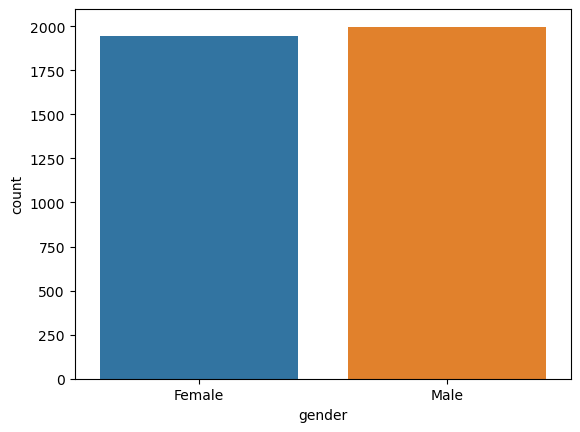

        gender    gender
Male      1997  0.506467
Female    1946  0.493533
Univariate assessment of feature partner:


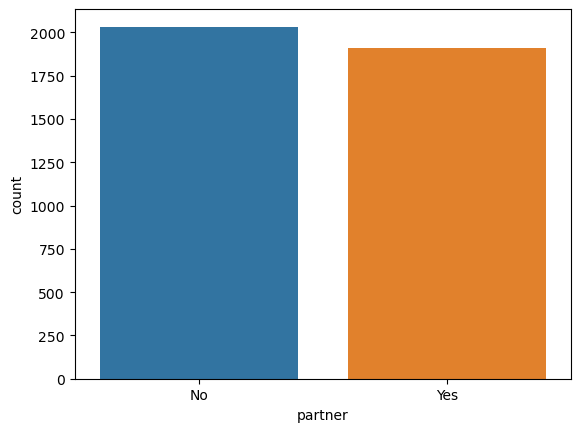

     partner   partner
No      2033  0.515597
Yes     1910  0.484403
Univariate assessment of feature dependents:


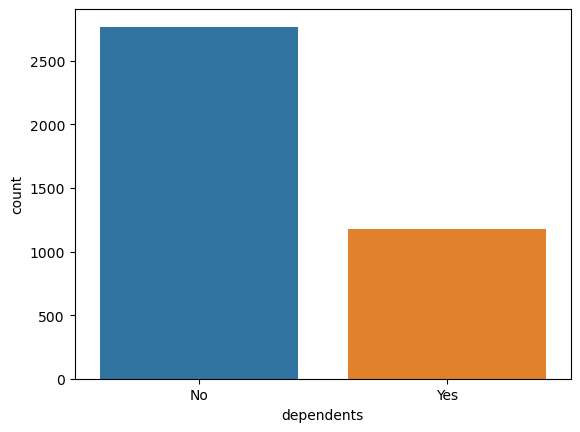

     dependents  dependents
No         2768    0.702004
Yes        1175    0.297996
Univariate assessment of feature phone_service:


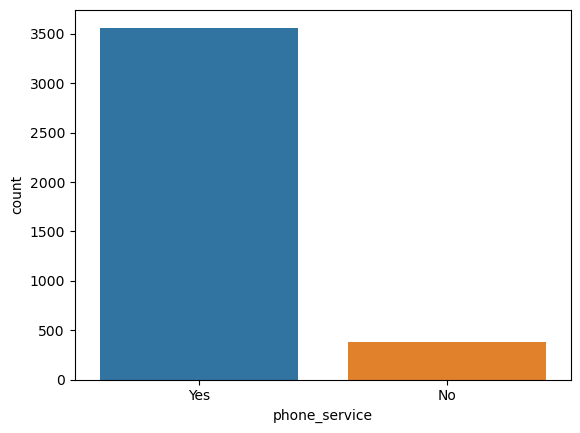

     phone_service  phone_service
Yes           3564        0.90388
No             379        0.09612
Univariate assessment of feature multiple_lines:


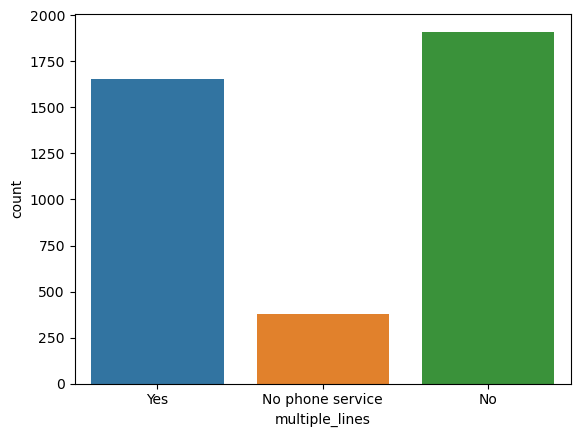

                  multiple_lines  multiple_lines
No                          1912         0.48491
Yes                         1652         0.41897
No phone service             379         0.09612
Univariate assessment of feature online_security:


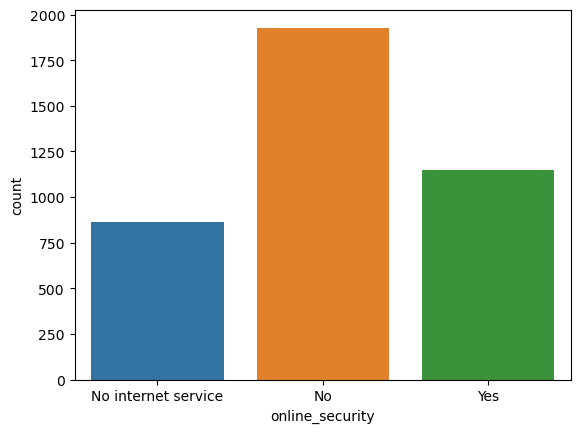

                     online_security  online_security
No                              1929         0.489221
Yes                             1149         0.291402
No internet service              865         0.219376
Univariate assessment of feature online_backup:


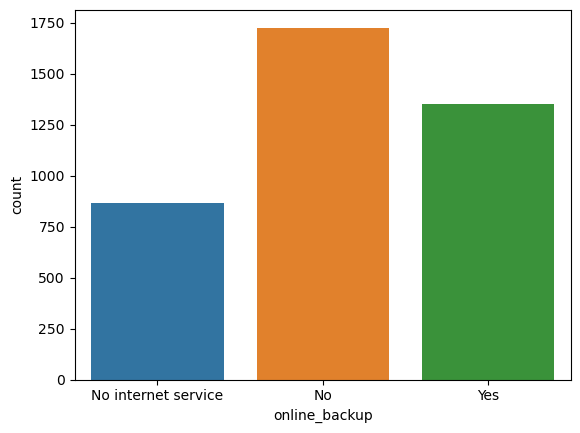

                     online_backup  online_backup
No                            1726       0.437738
Yes                           1352       0.342886
No internet service            865       0.219376
Univariate assessment of feature device_protection:


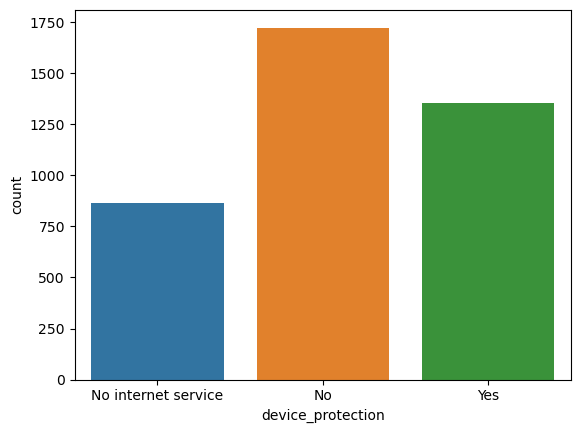

                     device_protection  device_protection
No                                1724           0.437231
Yes                               1354           0.343393
No internet service                865           0.219376
Univariate assessment of feature tech_support:


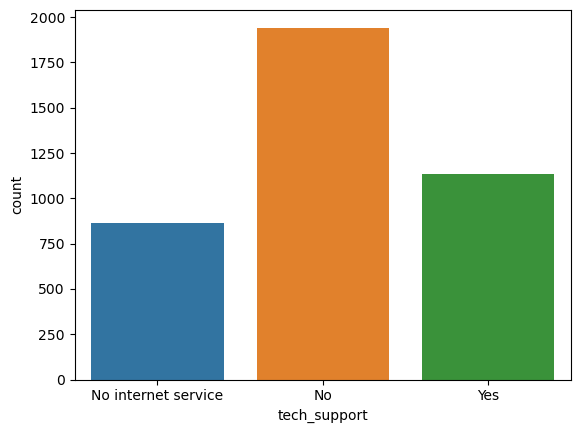

                     tech_support  tech_support
No                           1942      0.492518
Yes                          1136      0.288106
No internet service           865      0.219376
Univariate assessment of feature streaming_tv:


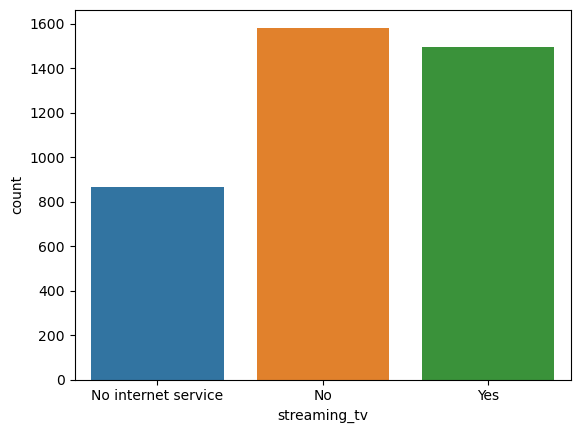

                     streaming_tv  streaming_tv
No                           1583      0.401471
Yes                          1495      0.379153
No internet service           865      0.219376
Univariate assessment of feature streaming_movies:


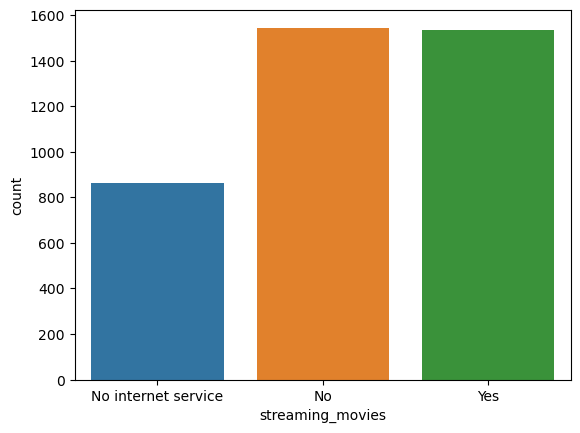

                     streaming_movies  streaming_movies
No                               1545          0.391834
Yes                              1533          0.388790
No internet service               865          0.219376
Univariate assessment of feature paperless_billing:


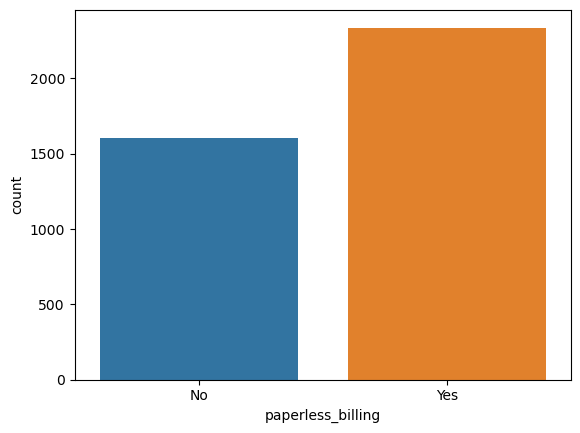

     paperless_billing  paperless_billing
Yes               2338            0.59295
No                1605            0.40705
Univariate assessment of feature churn:


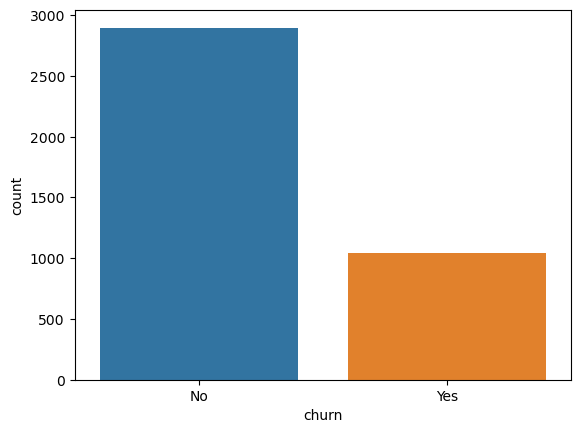

     churn    churn
No    2897  0.73472
Yes   1046  0.26528
Univariate assessment of feature contract_type:


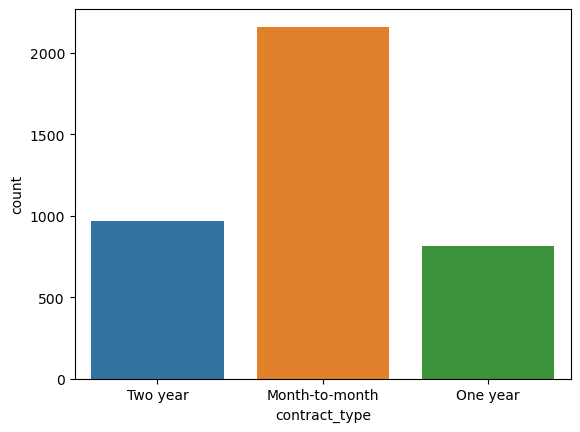

                contract_type  contract_type
Month-to-month           2161       0.548060
Two year                  969       0.245752
One year                  813       0.206188
Univariate assessment of feature internet_service_type:


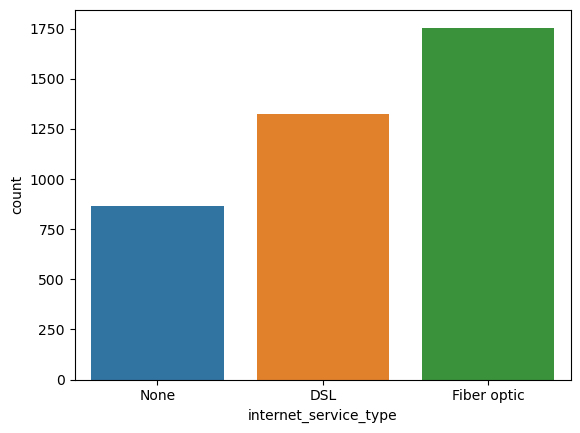

             internet_service_type  internet_service_type
Fiber optic                   1755               0.445093
DSL                           1323               0.335531
None                           865               0.219376
Univariate assessment of feature payment_type:


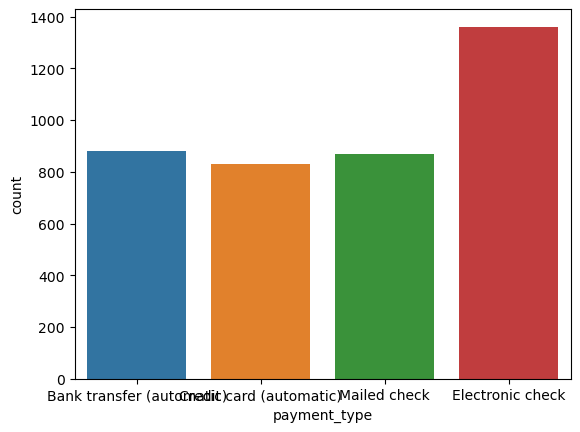

                           payment_type  payment_type
Electronic check                   1361      0.345169
Bank transfer (automatic)           880      0.223180
Mailed check                        870      0.220644
Credit card (automatic)             832      0.211007


In [18]:
#THIS IS FOR TRAIN
for col in cat_cols:
    print(f'Univariate assessment of feature {col}:')
    sns.countplot(data=train, x=col)
    plt.show()
    print(
        pd.concat([train[col].value_counts(),
        train[col].value_counts(normalize=True)],
             axis=1))

In [19]:
# # THIS IS FOR DF
# for col in cat_cols:
#     print(f'Univariate assessment of feature {col}:')
#     sns.countplot(data=df, x=col)
#     plt.show()
#     print(
#         pd.concat([df[col].value_counts(),
#         df[col].value_counts(normalize=True)],
#              axis=1))

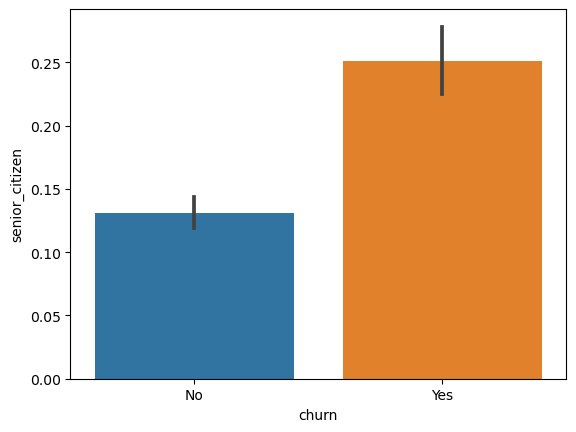

In [20]:
sns.barplot(y='senior_citizen',x='churn',data=train)
plt.show()

In [21]:
# Lets Run some CHi2 Tests:

#CONTRACT TYPE
train[['contract_type','churn']]

df_contract_x =pd.crosstab(train['contract_type'],train['churn'])
df_contract_x

churn,No,Yes
contract_type,,
Month-to-month,1241,920
One year,715,98
Two year,941,28


In [22]:
stats.chi2_contingency(df_contract_x)

(650.6166776362105,
 5.252711329723749e-142,
 2,
 array([[1587.72939386,  573.27060614],
        [ 597.32716206,  215.67283794],
        [ 711.94344408,  257.05655592]]))

In [23]:
# Lets Run some CHi2 Tests:

#DEPENDENTS
train[['dependents','churn']]

df_dependents_x =pd.crosstab(train['dependents'],train['churn'],margins=True)
df_dependents_x

churn,No,Yes,All
dependents,,,
No,1910,858,2768
Yes,987,188,1175
All,2897,1046,3943


In [24]:
stats.chi2_contingency(df_dependents_x)

(95.18438178355419,
 1.0412154283328868e-19,
 4,
 array([[2033.70428608,  734.29571392, 2768.        ],
        [ 863.29571392,  311.70428608, 1175.        ],
        [2897.        , 1046.        , 3943.        ]]))

In [25]:
# Lets Run some CHi2 Tests:

#PAPERLESS
train[['paperless_billing','churn']]

df_paperless_x =pd.crosstab(train['paperless_billing'],train['churn'])
df_paperless_x

churn,No,Yes
paperless_billing,,
No,1336,269
Yes,1561,777


In [26]:
stats.chi2_contingency(df_paperless_x)

(131.66139738100526,
 1.7744488509875074e-30,
 1,
 array([[1179.22520923,  425.77479077],
        [1717.77479077,  620.22520923]]))

In [27]:
# Lets Run some CHi2 Tests:

#GENDER
train[['gender','churn']]

df_gender_x =pd.crosstab(train['gender'],train['churn'])
df_gender_x

churn,No,Yes
gender,,
Female,1416,530
Male,1481,516


In [28]:
stats.chi2_contingency(df_gender_x)

(0.9159475236298575,
 0.33854127483141705,
 1,
 array([[1429.76464621,  516.23535379],
        [1467.23535379,  529.76464621]]))

In [29]:
# Lets Run some CHi2 Tests:

#SENIOR CITIZEN
train[['senior_citizen','churn']]

df_senior_x =pd.crosstab(train['senior_citizen'],train['churn'])
df_senior_x

churn,No,Yes
senior_citizen,,
0,2518,783
1,379,263


In [30]:
stats.chi2_contingency(df_senior_x)

(81.1312220350024,
 2.1121645962713915e-19,
 1,
 array([[2425.30991631,  875.69008369],
        [ 471.69008369,  170.30991631]]))

In [31]:
# Lets Run some CHi2 Tests:

#PARTNER
train[['partner','churn']]

df_partner_x =pd.crosstab(train['partner'],train['churn'])
df_partner_x

churn,No,Yes
partner,,
No,1364,669
Yes,1533,377


In [32]:
stats.chi2_contingency(df_partner_x)

(86.94715312061643,
 1.1146002156273985e-20,
 1,
 array([[1493.68526503,  539.31473497],
        [1403.31473497,  506.68526503]]))

In [33]:
# Lets Run some CHi2 Tests:

#PAYMENT_TYPE
train[['payment_type','churn']]

df_payment_x =pd.crosstab(train['payment_type'],train['churn'])
df_payment_x

churn,No,Yes
payment_type,,
Bank transfer (automatic),734,146
Credit card (automatic),704,128
Electronic check,751,610
Mailed check,708,162


In [34]:
stats.chi2_contingency(df_payment_x)

(359.1428664101252,
 1.5627711225751631e-77,
 3,
 array([[646.55338575, 233.44661425],
        [611.28683743, 220.71316257],
        [999.95358864, 361.04641136],
        [639.20618818, 230.79381182]]))

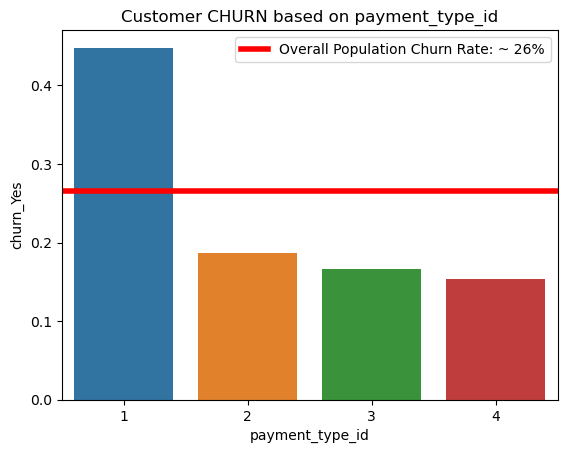

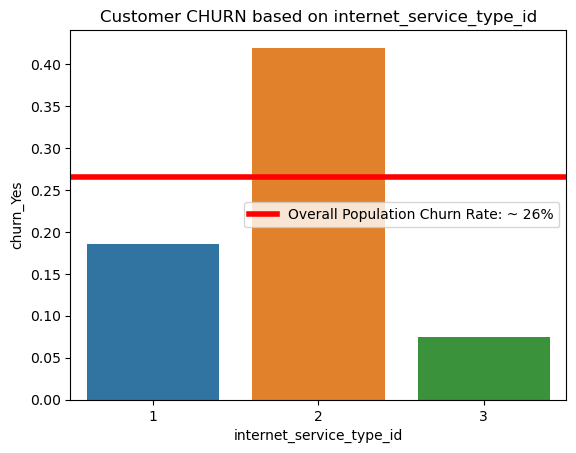

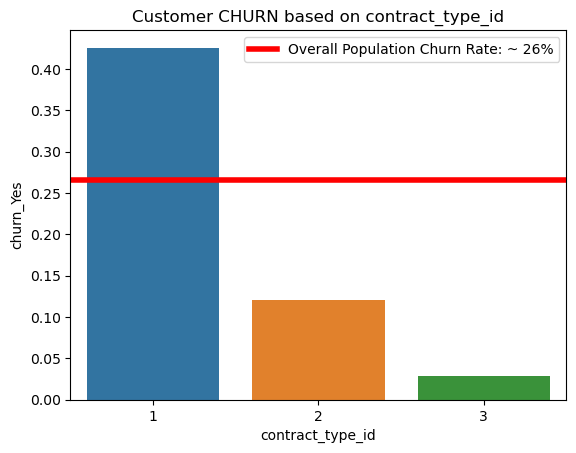

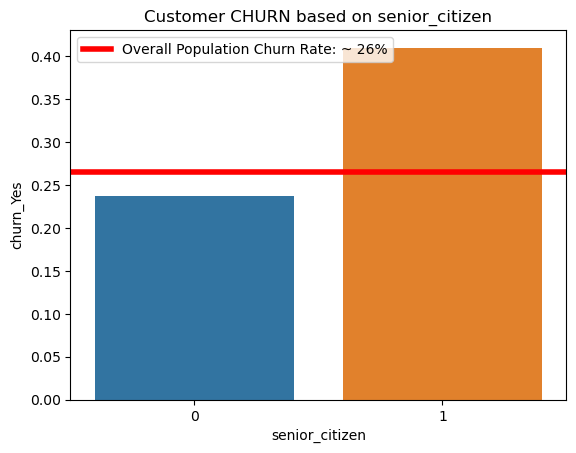

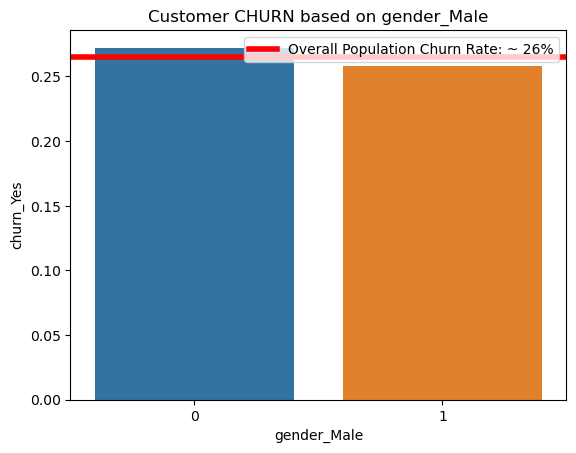

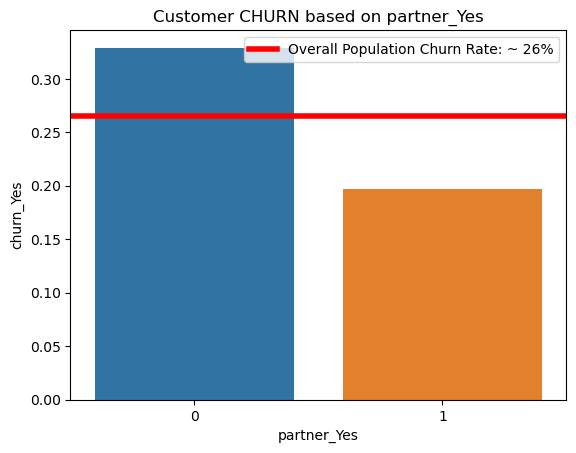

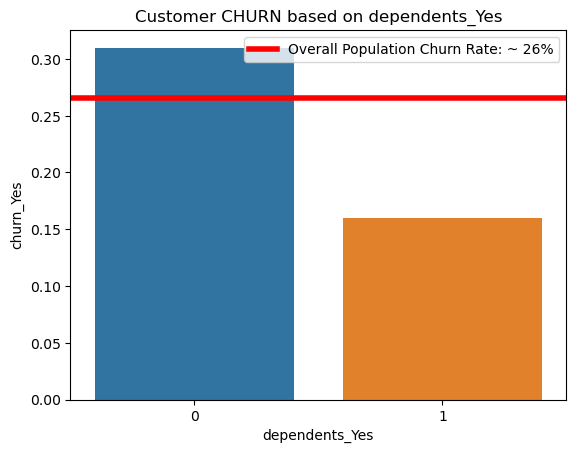

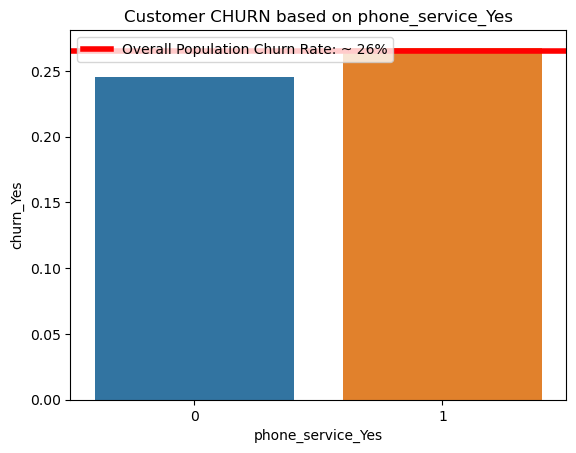

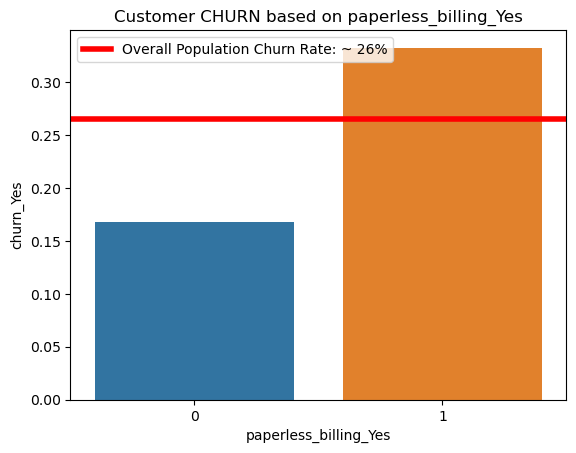

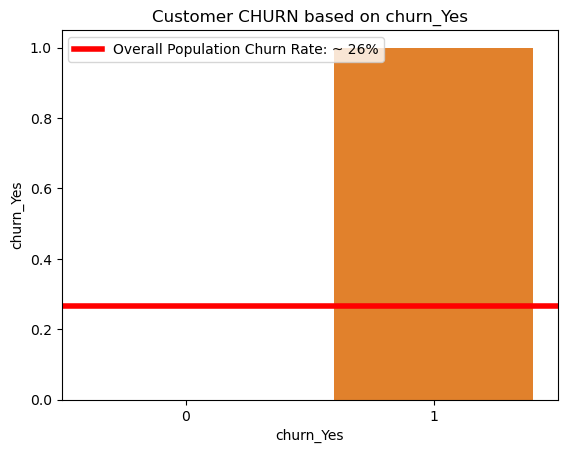

In [35]:
for col in cat_cols_e:
    if col != 'churn':
        sns.barplot(data=train,
                    x=col,
                    y = 'churn_Yes',
                   ci=False)
        plt.title(f'Customer CHURN based on {col}')
        plt.axhline(train.churn_Yes.mean(),label='Overall Population Churn Rate: ~ 26%',color='red',linewidth=4)
        plt.legend()
        plt.show()

In [36]:
df_payment_x =pd.crosstab(train['payment_type'],train['churn'])
df_payment_x

churn,No,Yes
payment_type,,
Bank transfer (automatic),734,146
Credit card (automatic),704,128
Electronic check,751,610
Mailed check,708,162


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 1166 to 5872
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   gender                    3943 non-null   object 
 4   senior_citizen            3943 non-null   int64  
 5   partner                   3943 non-null   object 
 6   dependents                3943 non-null   object 
 7   tenure                    3943 non-null   int64  
 8   phone_service             3943 non-null   object 
 9   multiple_lines            3943 non-null   object 
 10  online_security           3943 non-null   object 
 11  online_backup             3943 non-null   object 
 12  device_protection         3943 non-null   object 
 13  tech_support              3943 non-null   object 
 14  strea

In [38]:
# filename = "telco_new_train2013.csv"
# train.to_csv(filename,index=False)

In [39]:
# sns.pairplot(train,hue='churn',corner=True)

#### OK, DO THE THING...

In [40]:
X_cols = cat_cols_e
y_cols = 'churn_Yes'

In [41]:
X_cols.remove('churn_Yes')
X_cols,y_cols

(['payment_type_id',
  'internet_service_type_id',
  'contract_type_id',
  'senior_citizen',
  'gender_Male',
  'partner_Yes',
  'dependents_Yes',
  'phone_service_Yes',
  'paperless_billing_Yes'],
 'churn_Yes')

In [42]:
# make the thing
clf = DecisionTreeClassifier()

In [43]:
# whats the thing?
clf

DecisionTreeClassifier()

In [44]:
X_train = train[X_cols]
y_train = train['churn']

X_validate = validate[X_cols]
y_validate = validate['churn']

X_test = test[X_cols]
y_test = test['churn']

In [45]:
# fit the thing:
# note that i am not assigning clf.fit into anything
# clf.fit changes the object itself,
# which means its ready to use!
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# use the thing!!
model_1_preds = clf.predict(X_train)
model_1_preds[:10]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [47]:
# accuracy lil more like we saw before
accuracy_score(y_train, model_1_preds)

0.806492518387015

In [48]:
pd.crosstab(model_1_preds,y_train) # see the actual survived status is now columns

churn,No,Yes
row_0,,
No,2609,475
Yes,288,571


In [49]:
# classification report:
print(
    classification_report(y_train,
                      model_1_preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      2897
         Yes       0.66      0.55      0.60      1046

    accuracy                           0.81      3943
   macro avg       0.76      0.72      0.74      3943
weighted avg       0.80      0.81      0.80      3943



In [50]:
model_1_proba = clf.predict_proba(X_train)
model_1_proba[:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.52      , 0.48      ],
       [0.73333333, 0.26666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [51]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')


Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): 0.806492518387015
Accuracy (validate): 0.76878


# BARRY 

In [52]:
from sklearn.ensemble import RandomForestClassifier

# make the thing
rf1 = RandomForestClassifier(n_estimators=25)
# fit the thing
# note: if we narrow down the feature in fit:
rf1.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf1_preds = rf1.predict(X_train)

In [53]:
pd.crosstab(rf1_preds,y_train) # see the actual survived status is now columns

churn,No,Yes
row_0,,
No,2532,402
Yes,365,644


In [54]:
rf1_preds.dtype

dtype('O')

In [55]:
# classification report:
print(
    classification_report(y_train,
                      rf1_preds))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87      2897
         Yes       0.64      0.62      0.63      1046

    accuracy                           0.81      3943
   macro avg       0.75      0.74      0.75      3943
weighted avg       0.80      0.81      0.80      3943



In [56]:
rf1_proba = rf1.predict_proba(X_train)
rf1_proba[:10]

array([[1.        , 0.        ],
       [0.97333333, 0.02666667],
       [0.49855033, 0.50144967],
       [0.73590278, 0.26409722],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.64304762, 0.35695238],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [57]:
barry_preds = rf1.predict(X_test)
barry_proba = rf1.predict_proba(X_test)
pd.crosstab(barry_preds,y_test) # a confusion matrix with ACTUALS as columns and PREDICTIONS as rows

churn,No,Yes
row_0,,
No,880,196
Yes,155,178


In [58]:
# here is a classification report with many different measurements and ratios based upon the TEST subset
# for our purposes here we will look at ACCURACY (0.76) and RECALL for the YES class (0.45).

print(
    classification_report(y_test,
                      barry_preds))

              precision    recall  f1-score   support

          No       0.82      0.85      0.83      1035
         Yes       0.53      0.48      0.50       374

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.75      0.75      1409



In [59]:
pd.crosstab(barry_preds,y_test) # a confusion matrix with ACTUALS as columns and PREDICTIONS as rows

churn,No,Yes
row_0,,
No,880,196
Yes,155,178


In [60]:
barry_proba

array([[0.935     , 0.065     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.97      , 0.03      ],
       [0.45352381, 0.54647619],
       [1.        , 0.        ]])

In [61]:
barry_proba.shape

(1409, 2)

In [62]:
churn_proba = barry_proba[:,1:2]
churn_proba

array([[0.065     ],
       [0.        ],
       [0.        ],
       ...,
       [0.03      ],
       [0.54647619],
       [0.        ]])

In [63]:
test_cust_id

4558    6207-WIOLX
4481    6502-KUGLL
6373    5465-BUBFA
6667    3530-VWVGU
3439    9040-KZVWO
           ...    
828     0960-HUWBM
3611    8436-BJUMM
6341    5642-MHDQT
5376    2937-FTHUR
6569    4176-RELJR
Name: customer_id, Length: 1409, dtype: object

In [64]:
predictive_df = pd.DataFrame({'cust_id': test_cust_id})
predictive_df

,cust_id
4558,6207-WIOLX
4481,6502-KUGLL
6373,5465-BUBFA
6667,3530-VWVGU
3439,9040-KZVWO
...,...
828,0960-HUWBM
3611,8436-BJUMM
6341,5642-MHDQT
5376,2937-FTHUR


In [65]:
predictive_df['proba_churn'] = barry_proba[:,1:2]
predictive_df

,cust_id,proba_churn
4558,6207-WIOLX,0.065000
4481,6502-KUGLL,0.000000
6373,5465-BUBFA,0.000000
6667,3530-VWVGU,0.156846
3439,9040-KZVWO,0.000000
...,...,...
828,0960-HUWBM,0.000000
3611,8436-BJUMM,0.549292
6341,5642-MHDQT,0.030000
5376,2937-FTHUR,0.546476


In [66]:
barry_proba.dtype

dtype('float64')

In [67]:
predictive_df.head()

,cust_id,proba_churn
4558,6207-WIOLX,0.065000
4481,6502-KUGLL,0.000000
6373,5465-BUBFA,0.000000
6667,3530-VWVGU,0.156846
3439,9040-KZVWO,0.000000


In [68]:
predictive_df['barry_prediction'] = barry_preds

predictive_df

,cust_id,proba_churn,barry_prediction
4558,6207-WIOLX,0.065000,No
4481,6502-KUGLL,0.000000,No
6373,5465-BUBFA,0.000000,No
6667,3530-VWVGU,0.156846,No
3439,9040-KZVWO,0.000000,No
...,...,...,...
828,0960-HUWBM,0.000000,No
3611,8436-BJUMM,0.549292,Yes
6341,5642-MHDQT,0.030000,No
5376,2937-FTHUR,0.546476,Yes


In [79]:
predictive_df['prediction'] = predictive_df['barry_prediction'].map(
                   {'Yes':1 ,'No':0}).astype(int)
predictive_df

,cust_id,proba_churn,barry_prediction,prediction
4558,6207-WIOLX,0.065000,No,0
4481,6502-KUGLL,0.000000,No,0
6373,5465-BUBFA,0.000000,No,0
6667,3530-VWVGU,0.156846,No,0
3439,9040-KZVWO,0.000000,No,0
...,...,...,...,...
828,0960-HUWBM,0.000000,No,0
3611,8436-BJUMM,0.549292,Yes,1
6341,5642-MHDQT,0.030000,No,0
5376,2937-FTHUR,0.546476,Yes,1


In [87]:
predictive_df.prediction.mean()

0.23633782824698368

In [85]:
predictive_df.drop(columns='barry_prediction',inplace=True)

In [88]:
predictive_df

,cust_id,proba_churn,prediction
4558,6207-WIOLX,0.065000,0
4481,6502-KUGLL,0.000000,0
6373,5465-BUBFA,0.000000,0
6667,3530-VWVGU,0.156846,0
3439,9040-KZVWO,0.000000,0
...,...,...,...
828,0960-HUWBM,0.000000,0
3611,8436-BJUMM,0.549292,1
6341,5642-MHDQT,0.030000,0
5376,2937-FTHUR,0.546476,1


In [92]:
predictive_df.to_csv('predictions.csv',index=False)

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf2_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf2_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf2_preds))

In [ ]:
rf2_proba = rf.predict_proba(X_train)
rf2_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

#### OK, OPTIMIZE ...

In [ ]:
# make the thing
clf = DecisionTreeClassifier(min_samples_leaf=101)
clf.fit(X_train, y_train)
model_1_preds = clf.predict(X_train)
model_1_preds[:10]

In [ ]:
model_1_proba = clf.predict_proba(X_train)
model_1_proba[:10]

In [ ]:
pd.crosstab(model_1_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      model_1_preds))

In [ ]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
clf = DecisionTreeClassifier(min_samples_leaf=51)
clf.fit(X_train, y_train)
model_2_preds = clf.predict(X_train)
model_2_preds[:10]

In [ ]:
model_2_proba = clf.predict_proba(X_train)
model_2_proba[:10]

In [ ]:
pd.crosstab(model_2_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      model_2_preds))

In [ ]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101,max_depth=4)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf3_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf3_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf3_preds))

In [ ]:
rf3_proba = rf.predict_proba(X_train)
rf3_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101,max_depth=2)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf4_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf4_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf4_preds))

In [ ]:
rf4_proba = rf.predict_proba(X_train)
rf4_proba[:10]

In [ ]:
np.unique(rf4_preds,return_counts=True)

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

## CREATE A df to turn into a .csv titled PREDICTIONS with 3 cols

In [ ]:
predictive_df.head()

In [ ]:
predictive_df.prediction.mean()